# Práctica 2 PREDICCIÓN DEL ABANDONO (BURNOUT) DE EMPLEADOS

Autores: Joaquín García Pozo 100451183
         Andrés Rodríguez García 100451253

# Índice
1) Enlace del repositorio
2) Lectura del conjunto de datos
3) Análisis Exploratorio de Datos (EDA)
4) División de los datos
5) Construcción de modelos
6) Selección de atributos
7) Métodos avanzados
8) Modelo final

# 1) Enlace del repositorio

Esta práctica está alojada en el siguiente repositorio:
https://github.com/100451183/Grupo8_Practica1.git

En este repositorio están registrados todos los cambios que se han ido realizando a lo largo del desarrollo de la práctica

# 2) Lectura del conjunto de datos

Primero hay que realizar los imports necesarios para la correcta ejecución del código

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn import metrics

np.random.seed(53)

            hrs  absences  JobInvolvement  PerformanceRating  \
1      7.315971      13.0             2.0                  4   
6           NaN       NaN             NaN                  4   
13     8.871421       NaN             2.0                  3   
28    10.713066       6.0             NaN                  3   
30          NaN       NaN             2.0                  3   
...         ...       ...             ...                ...   
4405   8.316921       6.0             3.0                  3   
4406   5.897197       8.0             2.0                  3   
4407   7.149526       NaN             3.0                  4   
4408   9.187612       8.0             NaN                  3   
4409   6.511790      17.0             4.0                  3   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age  \
1                         3.0              2.0              4.0   NaN   
6                         1.0              3.0              1.0  28.0   
13          

Se lee el archivo con el conjunto de datos correspondiente al conjunto de datos del grupo 8, nuestro grupo.

In [ ]:
import pickle

# Abre el archivo en modo lectura binaria
with open('attrition_available_8.pkl', 'rb') as archivo:
    # Carga el contenido del archivo
    contenido = pd.read_pickle(archivo)

print(contenido);

# 3) Análisis exploratorio de datos

En este apartado se realiza un pequeño análisis exploratorio de datos para observar la dimensión del conjunto de datos, las variables, sus características y demás información relevante.

In [3]:
contenido.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,3532.000000,3614.000000,3671.000000,4410.000000,3643.000000,3492.000000,3436.000000,3561.000000,3644.000000,3684.000000,...,4410.000000,3648.000000,3692.000000,3502.0,3564.000000,3523.000000,3655.000000,3633.000000,3532.000000,3478.000000
mean,7.298300,12.727449,2.734677,3.153741,2.722481,2.735682,2.759022,36.820837,9.256312,2.910695,...,65029.312925,2.683388,15.208017,8.0,0.793210,11.190463,2.804651,6.983760,2.179785,4.120184
std,1.320757,5.498875,0.708373,0.360742,1.098952,1.104797,0.704833,9.149042,8.116341,1.024492,...,47068.888559,2.494376,3.634934,0.0,0.851044,7.624291,1.283183,6.139307,3.206604,3.574177
min,5.424757,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.269751,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,6.996222,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,...,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.880084,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [4]:
contenido.value_counts()

hrs        absences  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age   Attrition  BusinessTravel     Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeID  Gender  JobLevel  JobRole                 MaritalStatus  MonthlyIncome  NumCompaniesWorked  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
5.515640   20.0      3.0             3                  3.0                      4.0              3.0              21.0  No         Travel_Rarely      Sales                   2.0               3.0        Life Sciences     1.0            1236.0      Male    2         Manufacturing Director  Single         137570         1.0                 Y       12.0               8.0            1.0               0.0                3.0                    0.0             0.0                      0.0        

Comprobamos si hay valores nulos. Una vez ejecutada la celda, observamos que si hay valores nulos en la mayoría de las variables, lo que dificulta y empeora la predicción en menor medida.

In [5]:
contenido.isnull().any()

hrs                         True
absences                    True
JobInvolvement              True
PerformanceRating          False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
Age                         True
Attrition                  False
BusinessTravel             False
Department                  True
DistanceFromHome            True
Education                   True
EducationField              True
EmployeeCount               True
EmployeeID                  True
Gender                      True
JobLevel                   False
JobRole                     True
MaritalStatus               True
MonthlyIncome              False
NumCompaniesWorked          True
Over18                      True
PercentSalaryHike           True
StandardHours               True
StockOptionLevel            True
TotalWorkingYears           True
TrainingTimesLastYear       True
YearsAtCompany              True
YearsSinceLastPromotion     True
YearsWithC

In [6]:
contenido.isnull().sum()

hrs                        878
absences                   796
JobInvolvement             739
PerformanceRating            0
EnvironmentSatisfaction    767
JobSatisfaction            918
WorkLifeBalance            974
Age                        849
Attrition                    0
BusinessTravel               0
Department                 849
DistanceFromHome           766
Education                  726
EducationField             827
EmployeeCount              884
EmployeeID                 835
Gender                     766
JobLevel                     0
JobRole                    844
MaritalStatus              718
MonthlyIncome                0
NumCompaniesWorked         762
Over18                     844
PercentSalaryHike          718
StandardHours              908
StockOptionLevel           846
TotalWorkingYears          887
TrainingTimesLastYear      755
YearsAtCompany             777
YearsSinceLastPromotion    878
YearsWithCurrManager       932
dtype: int64

Dibujamos los valores nulos. Aquí se observa mejor la dimensionalidad de los valores nulos.

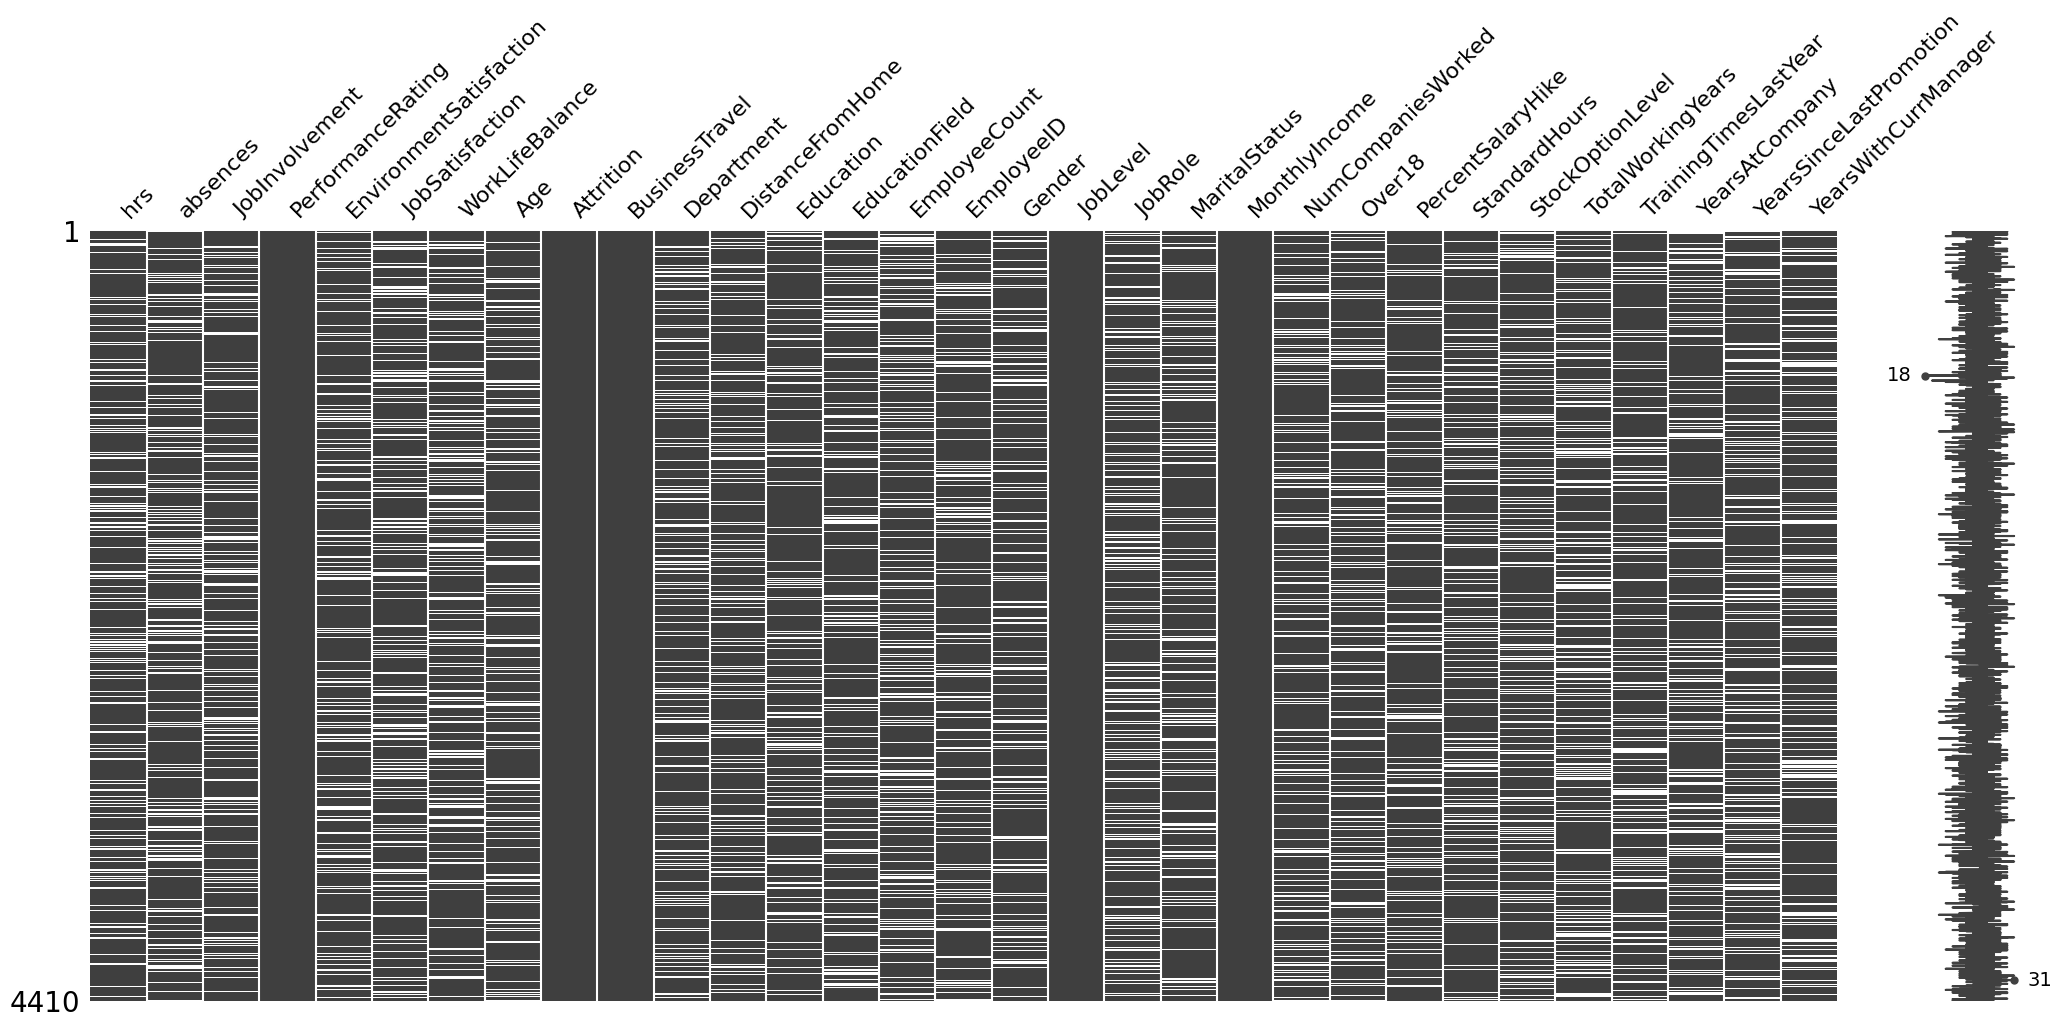

In [7]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(contenido)
plt.show()

In [8]:
#Porcentaje de valores nulos
contenido.isnull().sum() / len(contenido) * 100

hrs                        19.909297
absences                   18.049887
JobInvolvement             16.757370
PerformanceRating           0.000000
EnvironmentSatisfaction    17.392290
JobSatisfaction            20.816327
WorkLifeBalance            22.086168
Age                        19.251701
Attrition                   0.000000
BusinessTravel              0.000000
Department                 19.251701
DistanceFromHome           17.369615
Education                  16.462585
EducationField             18.752834
EmployeeCount              20.045351
EmployeeID                 18.934240
Gender                     17.369615
JobLevel                    0.000000
JobRole                    19.138322
MaritalStatus              16.281179
MonthlyIncome               0.000000
NumCompaniesWorked         17.278912
Over18                     19.138322
PercentSalaryHike          16.281179
StandardHours              20.589569
StockOptionLevel           19.183673
TotalWorkingYears          20.113379
T

Calculamos las correlaciones de los valores numéricos. El resultado se dibuja en una matriz de correlación, que muestra la correlación entre variables.

C:\Users\joaqu\AppData\Local\Temp\ipykernel_17944\2534703612.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_Matrix = contenido.corr()


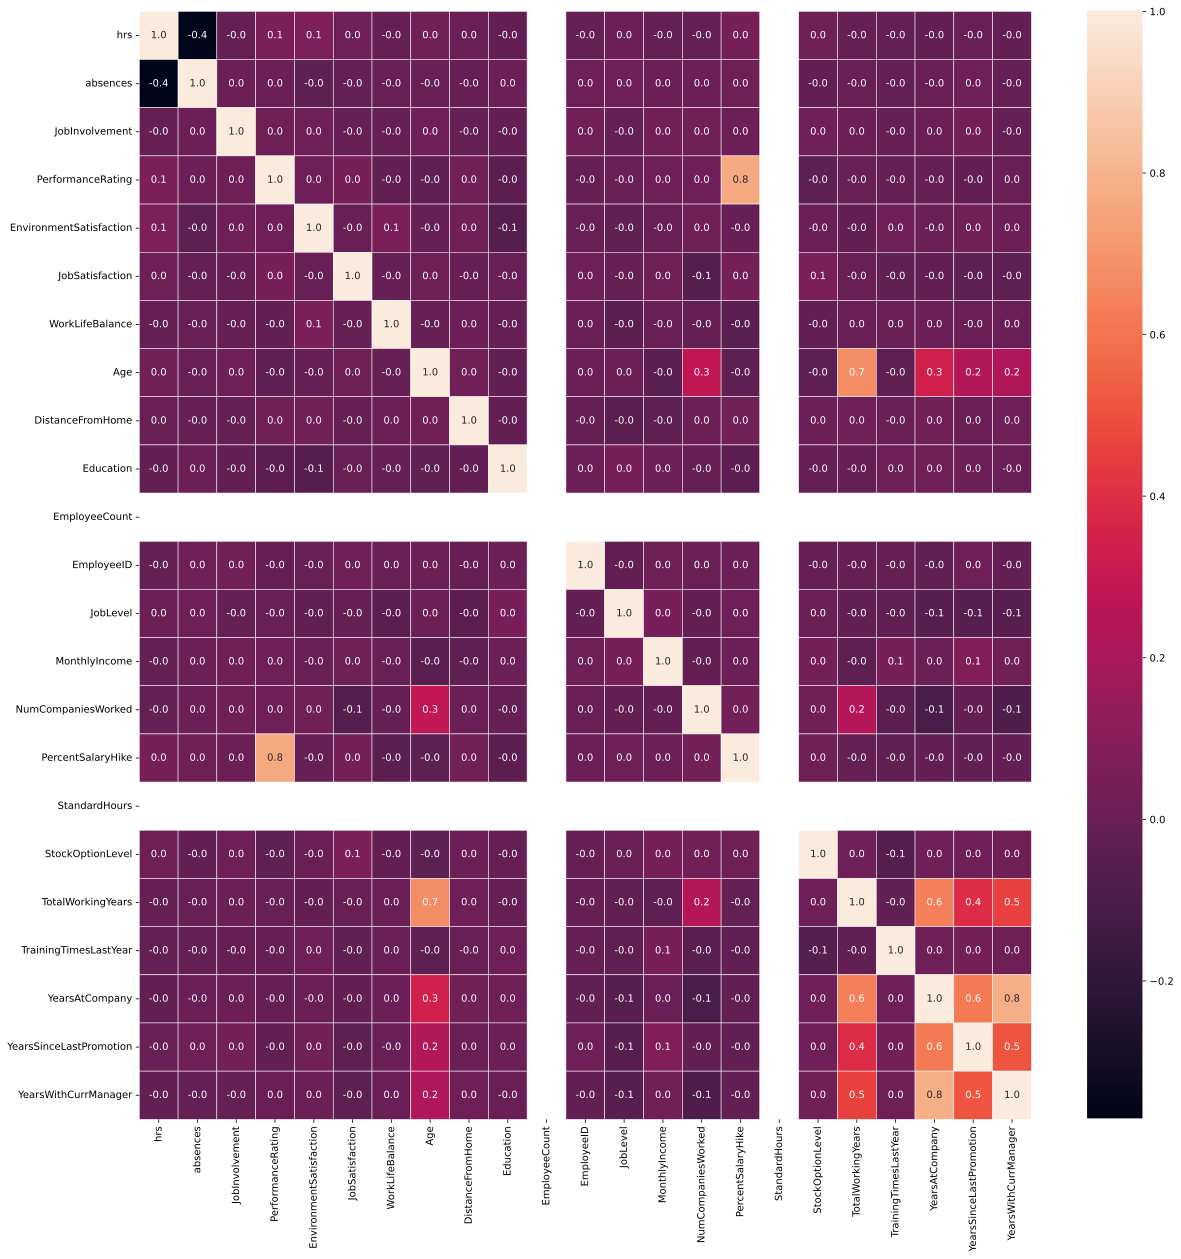

In [9]:
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

corr_Matrix = contenido.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap (corr_Matrix, linewidths = 0.5, annot = True, fmt= '.1f',ax=ax)
plt.show ()

# 4) División de los datos

Tras realizar un estudio primitivo de las variables de entrada hemos llegado a la conclusión, junto con anotaciones del profesor, que lo mejor es eliminar aquellas variables que tienen poca relación con la variable de salida, Attrition. Es por ello que se eliminan EmployeeID, EmployeeCount, Over18 y StandardHours. EmployeeID es el identificador del empleado, que a efectos prácticos, tiene nula relevancia en este estudio. Lo mismo pasa con EmployeeCount, que es el número de empleados que hay en la empresa. Directamente esta variable no afecta a la decisión de si un empleado va a abandonar la empresa o no, por lo que decidimos eliminarla. Por último, la variable Over18 no tiene mucho sentido en este ámbito. De hecho el enunciado indica que posiblemente la mayoría sean mayores de 18 años, por lo que la eliminamos. A demás, ya existe otra variable que indica la edad del empleado, la cual sí es relevante para la predicción. StandardHours, al igual que las anteriores, no varía, por lo que consideramos oportuno elimimarla también.

Dicho todo esto, vamos a seguir analizando mediante modelos qué variables son más influyentes en la predicción.

In [10]:
X = contenido.drop('Attrition', axis=1).drop('EmployeeID', axis=1).drop('EmployeeCount', axis=1).drop('Over18', axis=1).drop('StandardHours', axis=1)
y = contenido['Attrition']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=53, stratify=y)

# 5) Construcción de modelos

In [16]:
X_train.dtypes

hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike          float64
StandardHours              float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromotion    float64
YearsWithCurrManager       float64
dtype: object

Primero mediante la clase LabelEncoder del módulo preprocessing transformamos las etiquetas de clase de la variable objetivo en valores numéricos

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

y_test = le.transform(y_test)
y_train = le.transform (y_train)

Se separan las variables numéricas y categóricas. Las variables de tipo 'object' no son numéricas

In [18]:
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns
print(cat_cols)
print(num_cols)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')
Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## Variables categoricas

Se define un pipeline que se encarga de aplicar una serie de transformaciones a las variables categoricas. SampleImputer se encarga de manejar los valores faltantes en las variables categóricas. OneHotEncoder se encarga de convertir las variables categóricas en variables binarias utilizando la codificación one-hot. Por último, PCA  realiza una reducción de dimensionalidad aplicando el análisis de componentes principales (PCA).

In [19]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])

## Variables numéricas

Por otro lado, para las variables numéricas se define otro pipeline. KNNImputer se encarga de manejar los valores faltantes en las variables numéricas utilizando el algoritmo de imputación KNN (K-Nearest Neighbors). RobustScaler se encarga de escalar las variables numéricas utilizando el escalado robusto.

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

## Preprocessor

En este paso se realizan las transformaciones necesarias en las columnas numéricas y categóricas. Aquí queda definido el preprocesor

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



## Logistic Regression

Este pipeline aplica el preprocesamiento definido por preprocessor a los datos de entrada y luego ajusta un modelo de regresión logística a los datos preprocesados. La regresión logística es un algoritmo de aprendizaje supervisado utilizado para la clasificación de datos. Normalmente en los problemas de clasificación binaria se utiliza este método por su utilidad. Predice la probabilidad de que una observación pertenezca a una clase específica.

In [23]:
from sklearn.linear_model import LogisticRegression
logistic_regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('lr', LogisticRegression(class_weight='balanced', random_state = 53))])

Realizamos validación cruzada con el objetivo de medir la precisión

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

print(f"Precisión: {scores}")
print(f"Precisión media: {scores.mean():.2f} +- {scores.std():.2f}")

0.6879049855566048

A continuación se entrena el modelo, luego calculamos las predicciones y se imprimen algunas medidas necesarias para la evalucación de dicho modelo.

In [25]:
logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'P...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=53))])

In [26]:
y_pred = logistic_regression.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       740
           1       0.29      0.65      0.40       142

    accuracy                           0.68       882
   macro avg       0.60      0.67      0.59       882
weighted avg       0.81      0.68      0.72       882



La evalucación del modelo consiste en observar los valores de f1 y balanced_accuracy. F1 indica el rendimiento del modelo, siendo 1 buen rendimiento y 0 mal rendimiento. Balanced_accuracy indica la capacidad para clasificar correctamentelas muestras de las clases.

In [28]:
from sklearn.metrics import balanced_accuracy_score, f1_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precisión equilibrada:', balanced_acc)
print('Puntuación F1:', f1)

Precisión equilibrada: 0.6692139322421014
Puntuación F1: 0.39740820734341253


Estos valores no son muy altos, lo que sugiere que el modelo puede tener limitaciones en su capacidad para clasificar correctamente las muestras

## Matriz de confusión

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas para cada clase. Permite visualizar los errores de clasificación y analizar el desempeño del modelo en términos de falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos.
- Verdaderos positivos: casos en los que el modelo ha predicho correctamente una instancia como perteneciente a una clase.
- Verdaderos negativos: casos en los que el modelo ha predicho correctamente una instancia como no perteneciente a una clase.
- Falsos positivos: casos en los que el modelo ha predicho incorrectamente una instancia como perteneciente cuando en realidad no lo es.
- Falsos negativos: casos en los que el modelo ha predicho incorrectamente una instancia como no perteneciente cuando en realidad sí lo es.

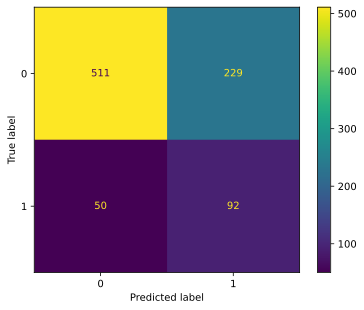

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=logistic_regression.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

Después de ver el significado de cada elemento en la matriz superior se observa que hay muchos falsos negativos y pocos verdaderos positivos y negativos, que son las predicciones correctas. De esto se concluye que el modelo no es muy bueno

## Curva ROC

La curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra el rendimiento de un modelo de clasificación binaria.
Compara el rendimiento de modelos de clasificación binaria en términos de su capacidad de discriminación entre las clases positiva y negativa.

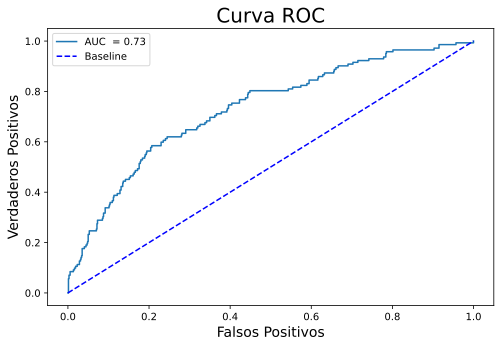

In [30]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = logistic_regression.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Como se puede observar, el hecho de que la curva se acerque a 1 indica un mejor rendimiento del modelo. Aún así, está más cerca de 0.5, mostrando un rendimiento casi aleatorio, por lo que no puede escogerse como modelo final. Vamos a realizar otros modelos para analizarlos y determinar si nos quedamos con este o por el contrario hay mejores.

## Clasificador XGBoost

El clasificador XGBoost es un modelo de aprendizaje automático que utiliza el algoritmo de refuerzo (boosting) para realizar tareas de clasificación. Proporciona un alto rendimiento predictivo y es ampliamente utilizado en competiciones de ciencia de datos y aplicaciones del mundo real.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

Se realiza un pipeline como el modelo anterior pero esta vez con el XGBClassifier.

In [32]:
from xgboost import XGBClassifier

xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state = 53))])


# Entrenar y evaluar el modelo con validación cruzada
scores = cross_val_score(xgb, X_train, y_train, scoring='balanced_accuracy', cv=5)

print(f"Precisión: {scores}")
print(f"Precisión media: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [0.73109294 0.74964438 0.74324324 0.72144074 0.77678333]
The average cross-validation accuracy is: 0.74 +- 0.02


Los resultados de precisión son buenos, mejores que el modelo anterior.

Se especifica que hay que hacer un ajuste de hiperparámetros, por lo que utilizamos gridsearch.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__learning_rate': [0.001, 0.01, 0.1],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0],
}


clf = GridSearchCV(estimator = xgb,
                    param_grid = param_grid,
                    scoring='balanced_accuracy',
                    cv=5,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

np.random.seed(53)

Se entrena el modelo y calculamos las predicciones.

In [34]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyInc...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=53, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 500, 1000],
                         'classifier__subsample': [0.8, 0.9, 1.0]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       740
           1       0.96      0.63      0.76       142

    accuracy                           0.94       882
   macro avg       0.94      0.81      0.86       882
weighted avg       0.94      0.94      0.93       882



In [37]:
from sklearn.metrics import balanced_accuracy_score, f1_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precisión equilibrada:', balanced_acc)
print('Puntuación F1:', f1)

Precisión equilibrada: 0.8106775789874382
Puntuación F1: 0.7574468085106384


Estas métricas son superiores al modelo anterior. Esto supone una mejora de rendimiento con respecto a este. Esto se debe a que este clasificador utiliza una función de pérdida especifica para optimizar el rendimiento del modelo durante el entrenamiento.

## Matriz de confusión

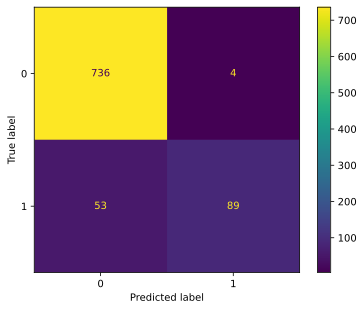

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Estos valores se asemejan al modelo anterior. Los falsos positivos han disminuido bastante, incrementando los verdaderos negativos.

## Curva ROC

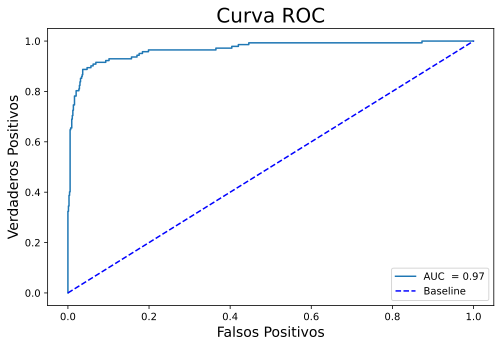

In [39]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = clf.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

El modelo prácticamente tiene muy buen rendimiento, puesto la curva se acerca a 1 y está lejos del rendimiento aleatorio en 0.5. Es por este resultado que se escoge principalmente este modelo como modelo final por el momento, sin haber evaluado con selección de características.
A continuación comienza el estudio de los modelos mediante la selección de atributos.

# Selección de características

A continuación usaremos un método de selección de atributos y comprobaremos si es posible mejorar los resultados anteriores. De entre los métodos disponibles hemos optado por usar mutual_info_classif. Primero, se ajusta un preprocesador a los datos de entrenamiento para realizar transformaciones necesarias. Luego, se calcula la importancia de las características mediante la función mutual_info_classif. Se seleccionan las 20 características más relevantes y se crea un nuevo DataFrame con esas características. El objetivo es reducir la dimensionalidad y mejorar el rendimiento de los modelos al mantener solo las características más informativas.

In [40]:
from sklearn.feature_selection import mutual_info_classif

np.random.seed(53)

# Ajustar el preprocesador a los datos de entrenamiento
preprocessor.fit(X_train)

# Transformar los datos de entrenamiento y prueba
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Calcular la importancia de las características utilizando mutual_info_classif
feature_scores = mutual_info_classif(X_train_preprocessed, y_train, random_state=53)


threshold = 20  # Número de características más relevantes a seleccionar
high_score_features = []

for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
    print(f_name, score)
    high_score_features.append(f_name)

df_mic = X[high_score_features]
print(df_mic)

Education 0.11619422451842554
TrainingTimesLastYear 0.05409118467325458
YearsSinceLastPromotion 0.05319434897348185
YearsAtCompany 0.05117942678816512
StockOptionLevel 0.04574743513232926
TotalWorkingYears 0.044733674030653425
hrs 0.03631435322163434
Age 0.03426822629767767
NumCompaniesWorked 0.03281991537525286
MaritalStatus 0.02454793866150151
StandardHours 0.02189148474610203
EnvironmentSatisfaction 0.01571733811987852
JobInvolvement 0.013168170947326363
MonthlyIncome 0.007130685784551227
Department 0.006681964083294023
DistanceFromHome 0.006020374798905381
JobSatisfaction 0.005569190722229944
BusinessTravel 0.003911699824362458
EducationField 0.0030884291724890822
WorkLifeBalance 0.0019870981219236583
      Education  TrainingTimesLastYear  YearsSinceLastPromotion  \
1           1.0                    3.0                      1.0   
6           2.0                    NaN                      0.0   
13          1.0                    4.0                      NaN   
28          2.0  

Dividimos el nuevo dataframe en conjunto de entrenamiento y prueba

In [41]:
X_train2,X_test2,y_train,y_test = train_test_split(df_mic, y, test_size=0.2, 
                                                     random_state=53, stratify=y)

Realizamos el preprocesado que hicimos anteriormente pero esta vez para los nuevos datos reducidos.

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

y_test = le.transform(y_test)
y_train = le.transform (y_train)

cat_cols = X_train2.select_dtypes(include="object").columns
num_cols = X_train2.select_dtypes(exclude="object").columns
print(cat_cols)
print(num_cols)

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

preprocessor_opt = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



Index(['MaritalStatus', 'Department', 'BusinessTravel', 'EducationField'], dtype='object')
Index(['Education', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'StockOptionLevel', 'TotalWorkingYears', 'hrs', 'Age',
       'NumCompaniesWorked', 'StandardHours', 'EnvironmentSatisfaction',
       'JobInvolvement', 'MonthlyIncome', 'DistanceFromHome',
       'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')


# Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_regression_opt = Pipeline(steps=[('preprocessor_opt', preprocessor_opt),
                      ('lr', LogisticRegression(class_weight='balanced', random_state = 53))])

In [44]:
from sklearn.model_selection import cross_val_score
np.random.seed(53)
cross_val_score(logistic_regression_opt, X_train2, y_train, cv=5, scoring="balanced_accuracy").mean()

print(f"Precisión: {scores}")
print(f"Precisión media: {scores.mean():.2f} +- {scores.std():.2f}")

0.7002383091239073

In [45]:
logistic_regression_opt.fit(X_train2, y_train)

Pipeline(steps=[('preprocessor_opt',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Education', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'StockOptionLevel', 'TotalWorkingYears', 'hrs', 'Age',
       'NumCompaniesWorked', 'StandardHours', 'EnvironmentSatisfaction',
       'JobIn...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['MaritalStatus', 'Department', 'BusinessTravel', 'EducationField'], dtype='object'))])),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=53))])

In [46]:
y_pred = logistic_regression_opt.predict(X_test2)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       740
           1       0.29      0.64      0.40       142

    accuracy                           0.69       882
   macro avg       0.60      0.67      0.59       882
weighted avg       0.81      0.69      0.72       882



In [48]:
from sklearn.metrics import balanced_accuracy_score, f1_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precisión equilibrada:', balanced_acc)
print('Puntuación F1:', f1)

Precisión equilibrada: 0.6677198325085649
Puntuación F1: 0.39651416122004357


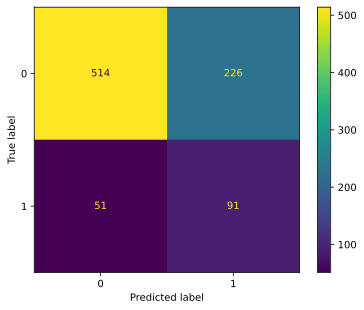

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=logistic_regression_opt.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_opt.classes_)
disp.plot()
plt.show()

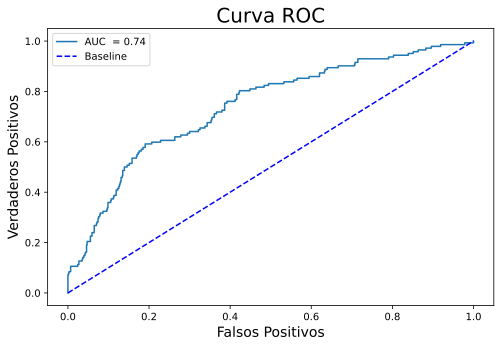

In [50]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = logistic_regression_opt.predict_proba(X_test2)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

# xgboost

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_opt = Pipeline(steps=[('preprocessor_opt', preprocessor_opt),
                      ('classifier', XGBClassifier(random_state = 53))])

np.random.seed(53)
scores = cross_val_score(xgb_opt, X_train2, y_train, cv=5, scoring="balanced_accuracy").mean()

# Imprimir los resultados
print(f"All the accuracies are: {scores}")
print(f"The average cross-validation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: 0.7628121896263282
The average cross-validation accuracy is: 0.76 +- 0.00


In [52]:
param_grid = {
    'classifier__learning_rate': [0.001, 0.01, 0.1],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0],
}

#budget = 40
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
clf_opt = GridSearchCV(estimator = xgb_opt,
                    param_grid = param_grid,
                    scoring='balanced_accuracy',
                    cv=5,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

In [53]:
# Recordar que "clf" hace una búsqueda para los mejores parámetros
np.random.seed(53)
clf_opt.fit(X=X_train2, y=y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_opt',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['Education', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'StockOptionLevel', 'TotalWorkingYears', 'hrs', 'Age',
       'NumCompaniesWorked', 'StandardHours', 'Env...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=53, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 500, 1000],
                         'classifier__subsample': [0.8, 0.9, 1.0]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [54]:
y_pred = clf_opt.predict(X_test2)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       740
           1       0.94      0.73      0.82       142

    accuracy                           0.95       882
   macro avg       0.95      0.86      0.90       882
weighted avg       0.95      0.95      0.95       882



In [56]:
from sklearn.metrics import balanced_accuracy_score, f1_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precisión equilibrada:', balanced_acc)
print('Puntuación F1:', f1)

Precisión equilibrada: 0.8586220022839741
Puntuación F1: 0.8207171314741036


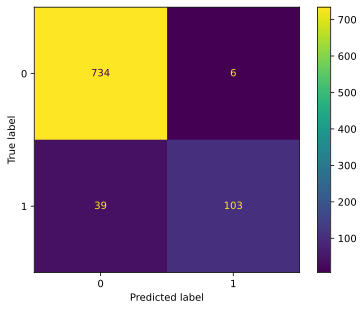

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf_opt.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_opt.classes_)
disp.plot()
plt.show()

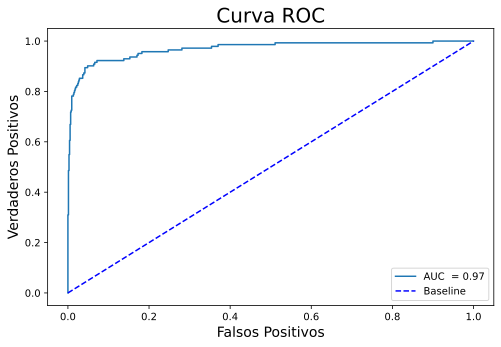

In [58]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = clf_opt.predict_proba(X_test2)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

# Modelo final

In [61]:
y2 = le.transform(y)
np.random.seed(53)
clf_opt.fit(df_mic, y2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_opt',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['Education', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'StockOptionLevel', 'TotalWorkingYears', 'hrs', 'Age',
       'NumCompaniesWorked', 'StandardHours', 'Env...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=53, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 500, 1000],
                         'classifier__subsample': [0.8, 0.9, 1.0]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [62]:
pickle.dump(clf_opt, open('modelo_final.pkl', 'wb'))